In [1]:
!pip install mediapipe opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/9f/99/5da7ae7f7e25847383bc2fe5a9adc7ce150dd371682f486c0666b407cad7/mediapipe-0.10.21-cp312-cp312-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/f4/58/cc0721a1030fcbab0984beea0bf3c4610ec103f738423cdfa9c4ceb40598/jax-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/66/e9/211ba3e46ec22c722c4d61a739cfccf79b0618006d6f5fa53eb4eb93ed6d/jaxlib-0.5.0-cp312-cp312-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/f7/13/756b13b8d5d417a0b4c3bf6ceafb59df0ed05cec7fedc2490bbbf5e60ebc/opencv_contrib_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining depen

In [2]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

2025-02-17 21:46:08.017136: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-17 21:46:08.138846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739808968.203241 1164222 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739808968.223258 1164222 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 21:46:08.326230: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
# VIDEO FEED
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [6]:
cap = cv2.VideoCapture(1)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


I0000 00:00:1739809016.742842 1164222 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1739809016.744115 1165023 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.3.6), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1739809016.792977 1165013 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739809016.818314 1165014 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739809017.109749 1165016 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


# 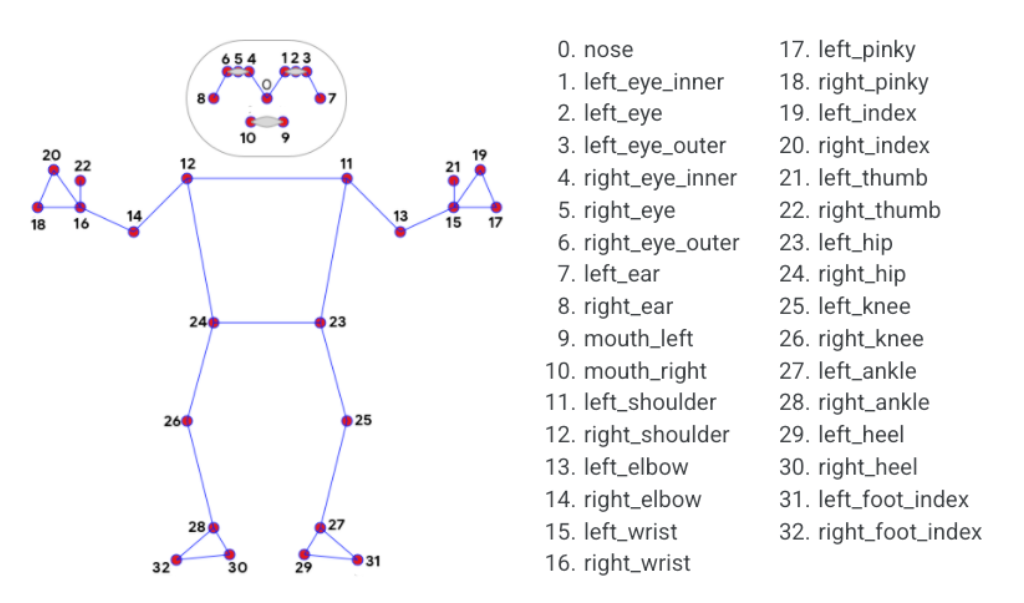

In [9]:
cap = cv2.VideoCapture(1)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1739809427.304281 1164222 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1739809427.306491 1167675 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.3.6), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1739809427.356954 1167666 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739809427.384198 1167670 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[x: 0.549488962
y: 0.598822
z: -0.685705066
visibility: 0.999937654
, x: 0.573887706
y: 0.533747435
z: -0.673752248
visibility: 0.999841452
, x: 0.590186298
y: 0.531122804
z: -0.673374891
visibility: 0.999859452
, x: 0.603527486
y: 0.529401064
z: -0.673465788
visibility: 0.999854684
, x: 0.518032849
y: 0.544034839
z: -0.651608169
visibility: 0.999838233
, x: 0.500816762
y: 0.546702445
z: -0.650826931
visibility: 0.999831676
, x: 0.487431198
y: 0.549671531
z: -0.650933862
visibility: 0.999814808
, x: 0.628303
y: 0.547456324
z: -0.455173731
visibility: 0.999893665
, x: 0.47355032
y: 0.571203351
z: -0.331046402
visibility: 0.99985981
, x: 0.589140654
y: 0.655023396
z: -0.593544364
visibility: 0.999943614
, x: 0.521973491
y: 0.661761343
z: -0.557636619
visibility: 0.999927402
, x: 0.790418744
y: 0.863944113
z: -0.309524536
visibility: 0.999326229
, x: 0.396796107
y: 0.817425609
z: -0.178495303
visibility: 0.999582946
, x: 0.903468132
y: 1.18721032
z: -0.262733221
visibility: 0.262404412
, 

In [10]:
len(landmarks)

33

In [17]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.765791595
y: 1.50740039
z: -0.403325379
visibility: 0.0392661355

 # Calculate Angles 


In [18]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 


In [19]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]


In [20]:
shoulder

[0.7462424039840698, 0.8475506901741028]

In [21]:
calculate_angle(shoulder, elbow, wrist)

155.8325205647847

In [ ]:
cap = cv2.VideoCapture(1)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                       
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1739810788.387161 1164222 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1739810788.388567 1176259 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.3.6), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1739810788.442937 1176250 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739810788.462456 1176249 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
